# Práctica 5
Resolver los ejercicios de las notas:

+ Propedeutico/R/clases/3_estadistica/1_elementos_de_estadistica_descriptiva.ipynb
+ Propedeutico/R/clases/3_estadistica/2_distribuciones_comunes.ipynb

In [76]:
install.packages('ggplot2')

Warning message:
"package 'ggplot2' is in use and will not be installed"

In [77]:
install.packages('tidyverse')

also installing the dependency 'dplyr'

Warning message:
"packages 'dplyr', 'tidyverse' are in use and will not be installed"

In [78]:
install.packages('dplyr')

Warning message:
"package 'dplyr' is in use and will not be installed"

In [79]:
library(ggplot2)

In [80]:
#library(tidyverse)

In [81]:
#library(dplyr)

In [82]:
library(tidyr)

In [83]:
options(repr.plot.width=3.5, repr.plot.height=3.5) #esta línea sólo se ejecuta para jupyterlab con R

In [84]:
options(digits=3)

In [85]:
library(MASS)
head(mammals)

,body,brain
Arctic fox,3.38,44.5
Owl monkey,0.48,15.5
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0


## Parte 1: 1_elementos_de_estadistica_descriptiva

### Ejercicios

**Preguntas:**

* ¿Cuál es el mamífero con el tamaño de cuerpo más grande? ¿cuál es el mínimo? ---> usa `which.max, which.min`.

* Ordena el dataset con la función `order` para la variable *body* en orden creciente y utiliza `tail` para encontrar los mamíferos con tamaño de cuerpo más grande.



In [86]:
which.max(mammals$body)

[1] 33

In [87]:
df2<-mammals[33,]
df2

,body,brain
African elephant,6654,5712


In [88]:
which.min(mammals$body)

[1] 14

In [89]:
df2<-mammals[which.min(mammals$body),]
df2

,body,brain
Lesser short-tailed shrew,0.005,0.14


* Ordena el dataset con la función `order` para la variable *body* en orden creciente y utiliza `tail` para encontrar los mamíferos con tamaño de cuerpo más grande.

In [90]:
df4<-order(mammals$body)

In [91]:
df5<-tail(order(mammals$body),)
df5

[1] 42  4 22 28 19 33

# Ejercicios

1) Considérese el experimento de lanzar $20$ veces una moneda y obtener la secuencia: $H,T,H,H,T,H,H,T,H,H,T,T,H,T,T,T,H,H,H,T$.

a) Tabular los resultados del experimento anterior encontrando las proporciones de $H$ y $T$ en los $20$ lanzamientos.

In [92]:
experimento1<-c("H","T","H","H","T","H","H","T","H","H","T","T","H","T","T","T","H","H","H","T")

In [93]:
table(experimento1)

experimento1
 H  T 
11  9 

In [94]:
prop.table(table(experimento1))

experimento1
   H    T 
0.55 0.45 

b) Graficar las proporciones con `barplot` y `plot`.

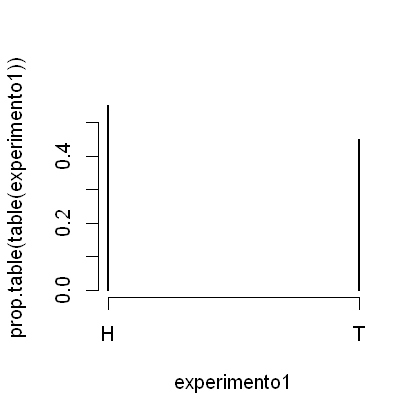

In [95]:
plot(prop.table(table(experimento1)))

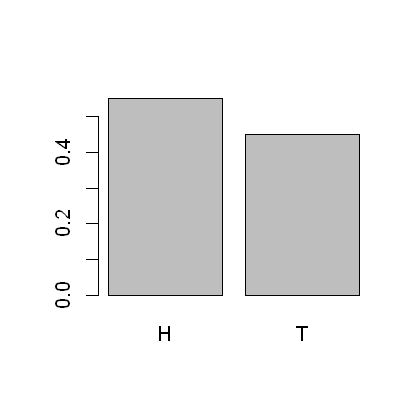

In [96]:
barplot(prop.table(table(experimento1)))

#### Segunda parte de ejercicios:

2) Para el dataset analizado anteriormente y que se creó: `log_mammals` realizar:

a)Para datos cuantitativos es común realizar diagramas de tallos y hojas. Investigar la interpretación de estos diagramas y usar la función `stem` del paquete `base` de *R* para realizar tales diagramas a las variables `log_body` y `log_brain` e interpretarlas.

In [97]:
log_mammals<-log(mammals)
colnames(log_mammals) <- c('mamlog_body', 'mamlog_brain')
head(log_mammals)
log_body<-log(mammals$body)
log_brain<-log(mammals$brain)

,mamlog_body,mamlog_brain
Arctic fox,1.219,3.80
Owl monkey,-0.734,2.74
Mountain beaver,0.300,2.09
Cow,6.142,6.05
Grey wolf,3.593,4.78
Goat,3.320,4.74


In [98]:
#?stem

In [99]:
stem(log_body)


  The decimal point is at the |

  -4 | 36
  -2 | 880863311
  -0 | 639763211
   0 | 00333557912233344459
   2 | 347366
   4 | 00114612335
   6 | 1338
   8 | 8



In [100]:
stem(log_brain)


  The decimal point is at the |

  -2 | 0
  -0 | 4219
   0 | 00269901344677899
   2 | 1445555789022789
   4 | 01467781122228
   6 | 00012552
   8 | 47



b) `scatterplot` coloreando diferente a cada grupo que se creó: `mamífero pequeño` y `mamífero grande` con la variable `size_body`.

Podemos añadir una nueva variable que sea categórica y represente el tamaño de los mamíferos: `grandes` y `chicos`. Un mamífero lo categorizamos como `grande` si el peso de su cuerpo está por encima de la mediana (para los datos transformados con `log`). Una variable `size` puede añadirse al `data.frame` para indicar lo anterior:

In [101]:
mediana_body = median(log_mammals$mamlog_body)
log_mammals$size_body = ifelse(log_mammals$mamlog_body >= mediana_body, "grande", "pequenio")
#añadimos también la de brain:
mediana_brain = median(log_mammals$mamlog_brain)
log_mammals$size_brain = ifelse(log_mammals$mamlog_brain >= mediana_brain, "grande", "pequenio")
head(log_mammals)

,mamlog_body,mamlog_brain,size_body,size_brain
Arctic fox,1.219,3.80,grande,grande
Owl monkey,-0.734,2.74,pequenio,pequenio
Mountain beaver,0.300,2.09,pequenio,pequenio
Cow,6.142,6.05,grande,grande
Grey wolf,3.593,4.78,grande,grande
Goat,3.320,4.74,grande,grande


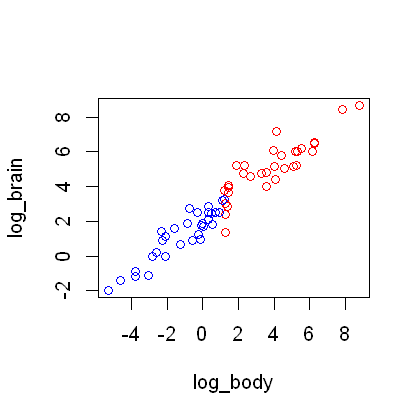

In [102]:
log_mammals$size_body_color = ifelse(log_mammals$size_body == "grande", "red", "blue")

plot(log_mammals$mamlog_body,log_mammals$mamlog_brain,xlab="log_body",
     ylab="log_brain",col=log_mammals$size_body_color)

c) Instalar el paquete `dplyr` para colocar los datos en un formato `long` y se pueda graficar con el paquete de `ggplot2` con la función `gather` el dataframe `log_mammals`. Después de instalar tal paquete, realizar mismo enunciado que a) pero con `geom_points` y paquete `ggplot2`.

In [103]:
#install.packages("dplyr")

In [104]:
head(log_mammals)

,mamlog_body,mamlog_brain,size_body,size_brain,size_body_color
Arctic fox,1.219,3.80,grande,grande,red
Owl monkey,-0.734,2.74,pequenio,pequenio,blue
Mountain beaver,0.300,2.09,pequenio,pequenio,blue
Cow,6.142,6.05,grande,grande,red
Grey wolf,3.593,4.78,grande,grande,red
Goat,3.320,4.74,grande,grande,red


In [105]:
library(tidyr)
long<-gather(log_mammals,"var","col",c(mamlog_body,mamlog_brain))
head(long)

size_body,size_brain,size_body_color,var,col
grande,grande,red,mamlog_body,1.219
pequenio,pequenio,blue,mamlog_body,-0.734
pequenio,pequenio,blue,mamlog_body,0.300
grande,grande,red,mamlog_body,6.142
grande,grande,red,mamlog_body,3.593
grande,grande,red,mamlog_body,3.320


In [106]:
#?gather


In [107]:
#ggLog_mammals<-ggplot(data=log_mammals, aes(x=log_mammals$mamlog_body, 
#                                            y= log_mammals$mamlog_brain, color=size_body))
long_plot<-ggplot(data=long, aes(x=var, 
                                            y= col, color=size_body))

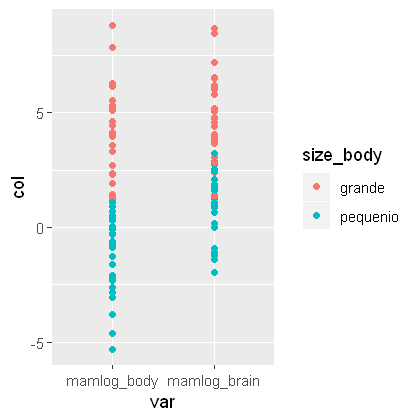

In [108]:
long_plot + geom_point()

d) Calcular estadísticas como el promedio, mediana, máximo y mínimo por grupos de `mamífero pequeño` y `mamífero grande` con `dplyr` y funciones como `group_by`, `sumarise` y el operador `%>%` (pipe). Ver como ayuda: [Data Wrangling with dplyr and tidyr](https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf) o [Data Transformation with dplyr](https://ugoproto.github.io/ugo_r_doc/dplyr.pdf) o bien como ejemplo de uso: https://genomicsclass.github.io/book/pages/dplyr_tutorial.html u otro tutorial en la red de `dplyr` ¿qué mamíferos en cada grupo están en los tres primeros lugares (pensando que se ordenan de forma decreciente en `log_brain`)?. 

In [109]:
install.packages("tidyverse")
#library(tidyverse)
library(tidyr)

also installing the dependency 'dplyr'

Warning message:
"packages 'dplyr', 'tidyverse' are in use and will not be installed"

In [110]:
install.packages("dplyr")

Warning message:
"package 'dplyr' is in use and will not be installed"

In [111]:
library(tidyr)

In [112]:
group_by(log_mammals,log_mammals$size_body) %>%#%>% es un pipe, que es como meter el resultado de una funcion en la siguiente función, el resultado de groupby pasa como primer argumento para la siguiente funcion "summarize"
  summarize(n(),mean(mamlog_body),median(mamlog_body),min(mamlog_body),max(mamlog_body)) #%>% #pipe me ahorra generar objetos

log_mammals$size_body,n(),mean(mamlog_body),median(mamlog_body),min(mamlog_body),max(mamlog_body)
grande,31,3.79,3.954,1.22,8.80
pequenio,31,-1.11,-0.598,-5.30,1.19


e) Crea una nueva variable `r` que sea el cociente entre `brain` y `body`. Ordena en orden creciente el dataset de `mammals` de acuerdo a esta nueva variable. ¿Qué mamíferos tienen los cocientes más grandes? ¿y cuáles los más pequeños?

In [113]:
log_mammals<-mutate(log_mammals,r=(log_mammals$mamlog_brain/log_mammals$mamlog_body))
head(log_mammals)

mamlog_body,mamlog_brain,size_body,size_brain,size_body_color,r
1.219,3.80,grande,grande,red,3.113
-0.734,2.74,pequenio,pequenio,blue,-3.734
0.300,2.09,pequenio,pequenio,blue,6.970
6.142,6.05,grande,grande,red,0.985
3.593,4.78,grande,grande,red,1.331
3.320,4.74,grande,grande,red,1.429


In [114]:
ord1<-head(order(log_mammals$r))

In [115]:
ord2<-tail(order(log_mammals$r))

¿Qué mamíferos tienen los cocientes más grandes? 

In [116]:
tab_ord1<-mammals[c(ord1),]
tab_ord1

,body,brain
Arctic ground squirrel,0.920,5.7
Tenrec,0.900,2.6
Rock hyrax-a,0.750,12.3
European hedgehog,0.785,3.5
Owl monkey,0.480,15.5
Chinchilla,0.425,6.4


¿y cuáles los más pequeños?

In [117]:
tab_ord2<-mammals[c(ord2),]
tab_ord2

,body,brain
Phalanger,1.62,11.4
Mountain beaver,1.35,8.1
Slow loris,1.40,12.5
Genet,1.41,17.5
Guinea pig,1.04,5.5
African giant pouched rat,1.00,6.6


f) Usando e) realiza un `scatterplot` de *r* vs `body`.

In [118]:
head(log_mammals)

mamlog_body,mamlog_brain,size_body,size_brain,size_body_color,r
1.219,3.80,grande,grande,red,3.113
-0.734,2.74,pequenio,pequenio,blue,-3.734
0.300,2.09,pequenio,pequenio,blue,6.970
6.142,6.05,grande,grande,red,0.985
3.593,4.78,grande,grande,red,1.331
3.320,4.74,grande,grande,red,1.429


In [119]:
ggLog_mammals_r<-ggplot(data=log_mammals, aes(x=log_mammals$mamlog_body, 
                                            y= log_mammals$r, color=size_body))


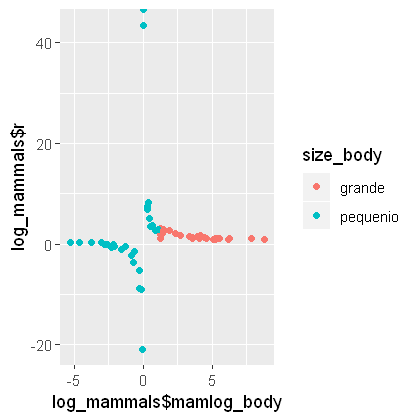

In [120]:
ggLog_mammals_r + geom_point()

3) Considérese el dataset `randu` (ejecutar `?randu` para una descripción):

a) Usar la función `mean` para calcular la media muestral en cada uno de los números que forman la tripleta: $x, y, z$. Asimismo usar la función `var` para calcular una matriz de varianzas y covarianzas muestral. 

In [121]:
dfrandu<-randu
names(dfrandu)

[1] "x" "y" "z"

In [122]:
print("media de x: ")
mean(dfrandu$x)

[1] "media de x: "


[1] 0.526

In [123]:
print("media de y: ")
mean(dfrandu$y)

[1] "media de y: "


[1] 0.486

In [124]:
print("media de z: ")
mean(dfrandu$z)

[1] "media de z: "


[1] 0.481

In [125]:
print("varianza de x: ")
var(dfrandu$x)

[1] "varianza de x: "


[1] 0.0812

In [126]:
print("varianza de y: ")
var(dfrandu$y)

[1] "varianza de y: "


[1] 0.0863

In [127]:
print("varianza de z: ")
var(dfrandu$z)

[1] "varianza de z: "


[1] 0.0779

In [128]:
#Matriz de Varanzas y covarianzas:
var(dfrandu)

,x,y,z
x,0.08123,-0.00406,0.00464
y,-0.00406,0.08627,-0.00515
z,0.00464,-0.00515,0.07786


b) Queremos ver la distribución del promedio por renglón de cada observación del dataset `randu`, para esto utilizar la función de `apply` para calcular tal promedio, alternativamente usar `rowMeans`.

In [129]:
distribucion_promedio<-apply(dfrandu,MARGIN=1,FUN=mean)
head(distribucion_promedio)

1        2        3        4        5        6 
0.000346 0.244722 0.844799 0.653828 0.546450 0.671117

Otr forma:

In [130]:
distribucion_promedio2<-rowMeans(dfrandu, na.rm = FALSE, dims = 1)

In [131]:
head(distribucion_promedio2)

1        2        3        4        5        6 
0.000346 0.244722 0.844799 0.653828 0.546450 0.671117

c) Utilizar la función `hist` del paquete base para calcular un histograma con los `breaks` definido por tal función. 

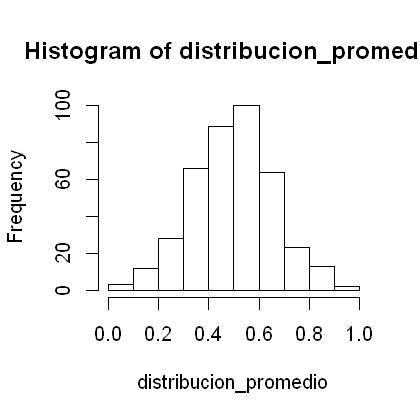

In [132]:
hist(distribucion_promedio)

d) Calcular sus propios `breaks` y volver a graficar el histograma con `hist` y con `geom_histogram` del paquete `ggplot2`.

In [133]:
#Para log_body:
dif <- 0.06
width <- .1
minimo <- min(distribucion_promedio) - dif
maximo <- max(distribucion_promedio) + dif
cortes_mean <- seq(minimo, maximo, by = width)

In [134]:
distribucion_promedio3<-data.frame(distribucion_promedio)
distribucion_promedio3$intervalo_mean <- cut(distribucion_promedio3$distribucion_promedio, breaks = cortes_mean)

In [135]:
table(distribucion_promedio3$intervalo_mean)


(-0.0597,0.0403]    (0.0403,0.14]      (0.14,0.24]      (0.24,0.34] 
               1                5               18               44 
     (0.34,0.44]      (0.44,0.54]      (0.54,0.64]      (0.64,0.74] 
              75               97               85               48 
     (0.74,0.84]      (0.84,0.94] 
              19                8 

In [136]:
head(distribucion_promedio3)

distribucion_promedio,intervalo_mean
0.000346,"(-0.0597,0.0403]"
0.244722,"(0.24,0.34]"
0.844799,"(0.84,0.94]"
0.653828,"(0.64,0.74]"
0.546450,"(0.54,0.64]"
0.671117,"(0.64,0.74]"


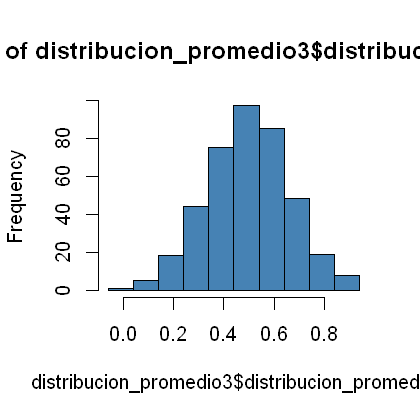

In [137]:
hist(distribucion_promedio3$distribucion_promedio, breaks=cortes_mean,col='steelblue')

graficando con ggplot2:

In [138]:
ggdistprom<-ggplot(data=distribucion_promedio3)

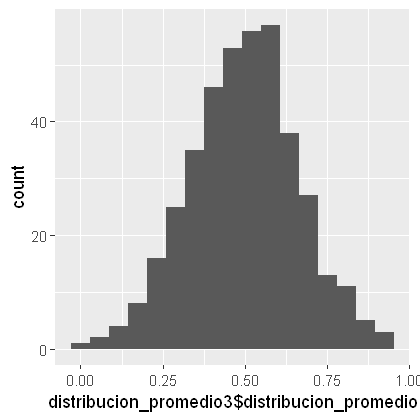

In [139]:
ggdistprom+geom_histogram(aes(x=distribucion_promedio3$distribucion_promedio),bins=17)

e) Utilizar la función `qqnorm` para comparar los cuantiles de una distribución normal con la distribución de las medias muestrales obtenidos en el inciso b). Sólo de forma visual ¿qué se puede concluir sobre la distribución de las medias muestrales calculadas en b)? (puedes añadir una línea al gráfico con `qqline`).

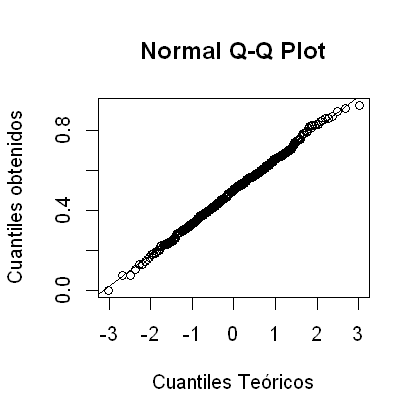

In [140]:
qqnorm(distribucion_promedio, main = "Normal Q-Q Plot",
       xlab = "Cuantiles Teóricos", ylab = "Cuantiles obtenidos",
       plot.it = TRUE)
qqline(distribucion_promedio, datax = FALSE, distribution = qnorm)

¿qué se puede concluir sobre la distribución de las medias muestrales calculadas en b)?

Se puede concluir que se comportan como una normal, pues están prácticamente sobre la recta de 45 grados

4) Realizar gráficas con el comando `qqplot` para comparar $2$ distribuciones de datos, por ejemplo:

In [141]:
options(repr.plot.width=4, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

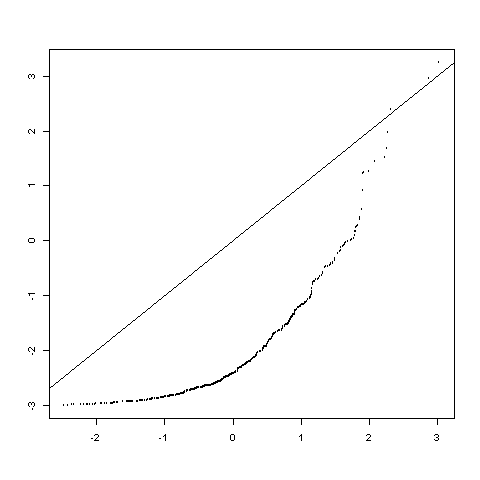

In [142]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n)-3, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Realizar conclusiones de sus gráficas `qqplot`. Por ejemplo, sin utilizar la información de cuáles distribuciones se han generado los datos, ni cuáles están en el eje vertical ni horizontal del gráfico anterior se puede establecer: "en el gráfico anterior se observa que una de las distribuciones está sesgada respecto a la otra. Este tipo de gráfica es similar al de una distribución sesgada a la derecha por lo que o bien, la cola izquierda de la otra distribución está más cercana a la mediana o tiene colas ligeras".

QQplot son gráficas de comparación de cuantiles.<br>
documentación de R: https://www.rdocumentation.org/packages/car/versions/3.0-3/topics/qqPlot <br>
se va a hacer la comparación entre la normal, la exponencial, 


### Normal contra Exponencial en cero

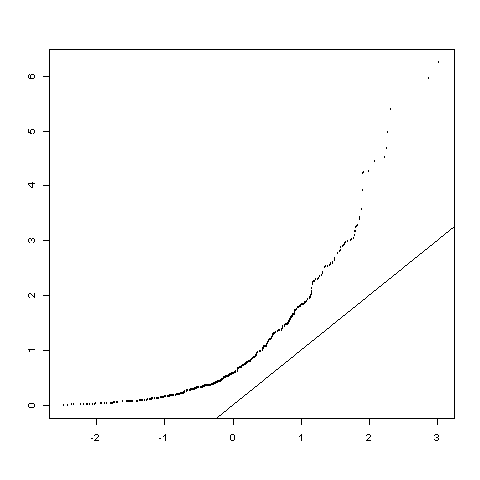

In [143]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n), cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

parecería que los cuantiles de la normal tiende a ser tangente a los cuantiles de la exponencial centrada en el origen

### Normal contra Exponencial desplazada una unidad

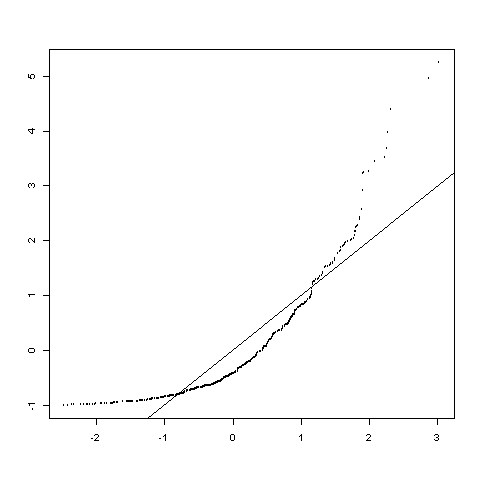

In [144]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n)-1, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

si centramos la exponencial en 1, parece que los cuantiles de la exponencial se parecen un poco más a los de la nomral en un punto cercano al interval de -1 a 1

### Normal contra uniforme

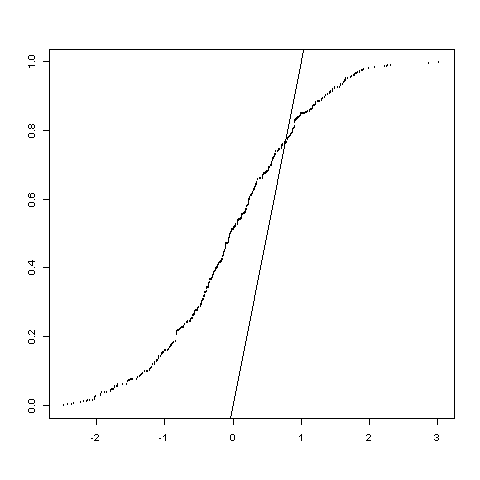

In [145]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), runif(n), cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Se observa bastante diferencia con la normal en cuanto a los cuantiles.

### Normal contra uniforme desplazada de la forma 2.5*runif(n)-1.2

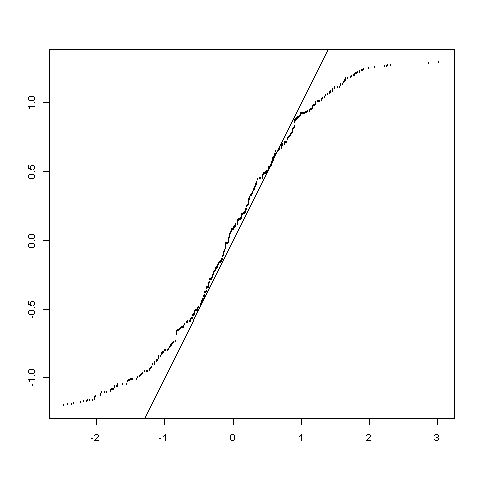

In [146]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), 2.5*runif(n)-1.2, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Esta uniforme parece tener una distribución de cuantiles muy similar a la normal en el intervalo de -1 a 1

### Normal contra Beta desplazada una unidad

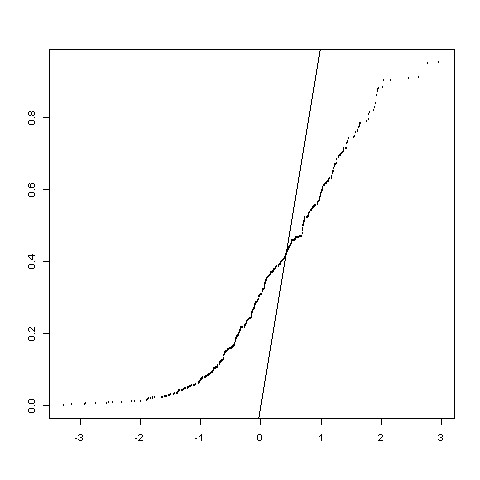

In [147]:
n<-500
set.seed(2000)
vec<-rbeta(n, shape1=.5,shape2=.5)
vec_eval<-dbeta(vec,shape1=.5,shape2=.5)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rbeta(n, shape1=1,shape2=2), cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Esta gráfica muestra que las distribuciones tienen cuantiles totalmente diferentes.

## Parte 2: 2_distribuciones_comunes

## Ejemplos

1) Si $X \sim N(1,2)$ calcular: $P(1<X<5)$.

Nuevamente usando: $$P(1 < X < 5) = 1 - P((1 < X < 5)^c) = 1 - P( (1 < X)^c \cup (X <5)^c)=$$

$$1 - P( X \leq 1 \cup 5 \leq X) = 1 - (P(X \leq 1) + P( 5 \leq X))$$

In [149]:
ext_izq <- 1
ext_der <- 5
media<-1
desv_est<-2
1-pnorm(ext_izq,media,desv_est)-pnorm(ext_der,media,desv_est, lower.tail = F)

[1] 0.477

2) Si $X \sim N(0,1)$ calcular: $P(Z>0), P(Z<-1), P(-1<Z<0)$

Para el cálculo de $P(Z>0)$:

In [150]:
ext_izq<-0
pnorm(ext_izq,lower.tail=F)

[1] 0.5

Para el cálculo de P(Z<-1):

Por simetría de la normal se tiene: $P(Z<-1)=P(Z>1)$

In [151]:
ext_izq<-1
pnorm(ext_izq,lower.tail=F)

[1] 0.159

De igual forma por simetría: $P(-1<Z<0) = P(0<Z<1)$

Nuevamente usando: $$P(-1 < Z < 0) = 1 - P((-1 < Z < 0)^c) = 1 - P( (-1 < Z)^c \cup (Z <0)^c)=$$

$$1 - P( Z \leq -1 \cup 0 \leq Z) = 1 - (P(Z \leq -1) + P( 0 \leq Z))$$

Como es una normal Z es la estandarizada, por lo tanto:

**Ejercicio: calcular este caso**

In [152]:
ext_izq <- -1
ext_der <- 0

1-pnorm(ext_izq)-pnorm(ext_der, lower.tail = F)

[1] 0.341

### Ejercicios 1

## Ejemplo

In [153]:
install.packages('prob')

package 'prob' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\Rtmp4Q2Be7\downloaded_packages


In [154]:
library(prob)

Warning message:
"package 'prob' was built under R version 3.6.1"Loading required package: combinat

Attaching package: 'combinat'

The following object is masked from 'package:utils':

    combn

Loading required package: fAsianOptions
Warning message:
"package 'fAsianOptions' was built under R version 3.6.1"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.6.1"Loading required package: fBasics
Warning message:
"package 'fBasics' was built under R version 3.6.1"Loading required package: fOptions
Warning message:
"package 'fOptions' was built under R version 3.6.1"
Attaching package: 'prob'

The following objects are masked from 'package:dplyr':

    intersect, setdiff, union

The following objects are masked from 'package:base':

    intersect, setdiff, union



Lanzamos **un dado** $100$ veces y hacemos un histograma con los resultados. Después tomamos **dos dados** y los lanzamos $50$ veces. **Sumamos** los números de las dos caras que aparecen en cada lanzamiento y realizamos un histograma con ellos. Tomamos ahora **tres dados** y lanzamos los tres juntos $50$ ocasiones. **Sumamos** los números de las tres caras que aparecen en cada lanzamiento y realizamos un histograma con los resultados. Las siguientes figuras muestran estos histogramas. Visualmente observamos como la **distribución de la suma de las caras tiende a ser normal**.

Caso de **un dado**

In [155]:
set.seed(2000)
n_sample<-100
prob<-rep(1/6,6)
dado <-sample(1:6,size=n_sample, replace=T,prob=prob)
gf<-ggplot(data.frame(valores=dado),aes(x=dado))

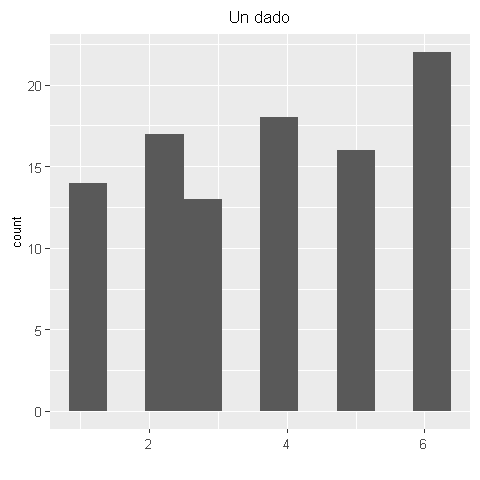

In [156]:
gf + geom_histogram(bins = 10)+
ggtitle('Un dado') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

Caso de **dos dados**

In [157]:
set.seed(2000)
n_sample<-100
prob<-c(1,2,3,4,5,6,5,4,3,2,1)/36
suma<-2:12
dos_dados<-sample(suma,n_sample,prob=prob,replace=T)
gf<-ggplot(data.frame(valores=dos_dados),aes(x=dos_dados))

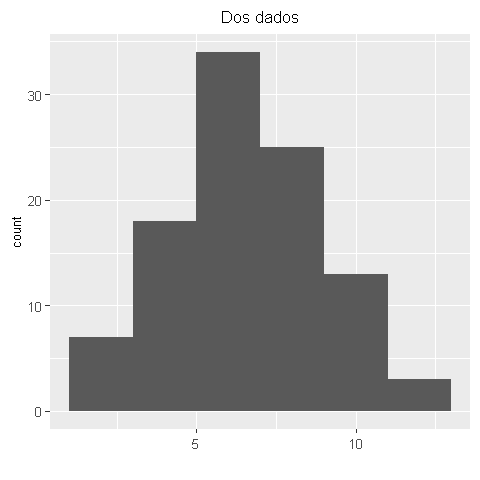

In [158]:
gf + geom_histogram(bins = 6)+
ggtitle('Dos dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

La gráfica se ve así:

Caso de **tres dados**

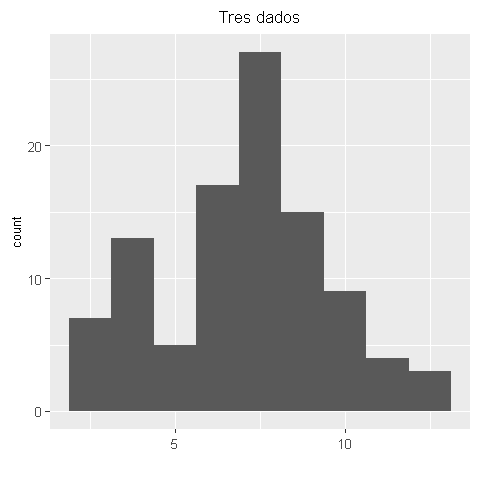

In [159]:
gf + geom_histogram(bins = 9)+
ggtitle('Tres dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

**Ejercicio: calcular este caso utilizando set.seed(2000), sample, ggplot2**

In [160]:
s<-rolldie(3,makespace=T)

In [161]:
head(s)

X1,X2,X3,probs
1,1,1,0.00463
2,1,1,0.00463
3,1,1,0.00463
4,1,1,0.00463
5,1,1,0.00463
6,1,1,0.00463


In [162]:
s_3<-addrv(s,FUN=sum,name='suma')

In [163]:
head(s_3)

X1,X2,X3,suma,probs
1,1,1,3,0.00463
2,1,1,4,0.00463
3,1,1,5,0.00463
4,1,1,6,0.00463
5,1,1,7,0.00463
6,1,1,8,0.00463


In [164]:
prob_suma_3_dados<-marginal(s_3,vars='suma')
head(prob_suma_3_dados)#extraer este vector de probabilidades y ponerlo en prob

suma,probs
3,0.00463
4,0.01389
5,0.02778
6,0.04630
7,0.06944
8,0.09722


In [165]:
set.seed(2000)
prob<-marginal(s_3,vars='suma')$probs
suma<-3:18
suma_tres_dados<-sample(suma,n_sample,prob=prob,replace=T)
gf<-ggplot(data.frame(valores=suma_tres_dados),aes(x=suma_tres_dados))

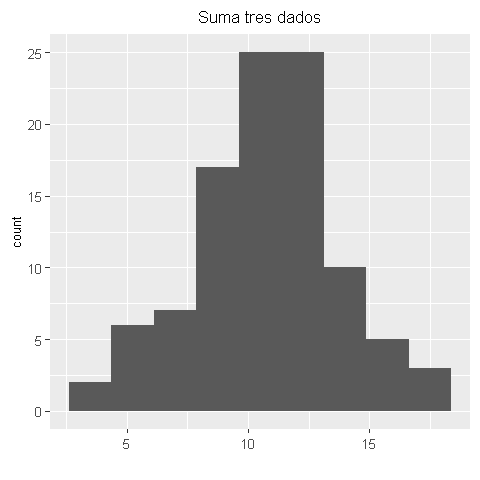

In [166]:
gf + geom_histogram(bins = 9)+
ggtitle('Suma tres dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

**Promedios**

Caso de **dos dados**

In [167]:
set.seed(2000)
n_sample<-100
prob<-c(1,2,3,4,5,6,5,4,3,2,1)/36
promedio<-(2:12)/2
dos_dados<-sample(promedio,n_sample,prob=prob,replace=T)
gf<-ggplot(data.frame(valores=dos_dados),aes(x=dos_dados))

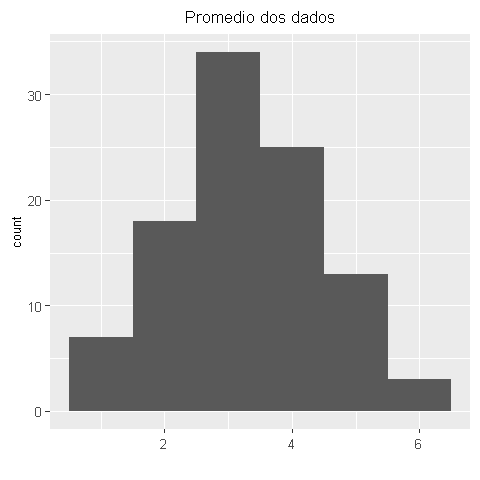

In [168]:
gf + geom_histogram(bins = 6)+
ggtitle('Promedio dos dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

Caso de **tres dados**

**Ejercicio: calcular este caso utilizando set.seed(2000), sample, ggplot2**

In [169]:
s_3_prom<-rolldie(3,makespace=T)

In [170]:
head(s_3_prom)

X1,X2,X3,probs
1,1,1,0.00463
2,1,1,0.00463
3,1,1,0.00463
4,1,1,0.00463
5,1,1,0.00463
6,1,1,0.00463


In [171]:
s_3_prom<-addrv(s_3_prom,FUN=sum,name='suma_dados')

In [172]:
head(s_3_prom)

X1,X2,X3,suma_dados,probs
1,1,1,3,0.00463
2,1,1,4,0.00463
3,1,1,5,0.00463
4,1,1,6,0.00463
5,1,1,7,0.00463
6,1,1,8,0.00463


In [173]:
#s_3_prom<-addrv(s_3_prom,promedio=s_3_prom$suma_dados/3,name='promedio')
s_3_prom$promedios<-s_3_prom$suma_dados/3

In [174]:
head(s_3_prom)

X1,X2,X3,suma_dados,probs,promedios
1,1,1,3,0.00463,1.00
2,1,1,4,0.00463,1.33
3,1,1,5,0.00463,1.67
4,1,1,6,0.00463,2.00
5,1,1,7,0.00463,2.33
6,1,1,8,0.00463,2.67


In [175]:
prob_suma_3_dados<-marginal(s_3_prom,vars='promedios')
head(prob_suma_3_dados)#extraer este vector de probabilidades y ponerlo en prob

promedios,probs
1.00,0.00463
1.33,0.01389
1.67,0.02778
2.00,0.04630
2.33,0.06944
2.67,0.09722


In [176]:
set.seed(2000)
prob<-marginal(s_3_prom,vars='promedios')$probs
proms<-(3:18)/3
suma_tres_dados<-sample(proms,n_sample,prob=prob,replace=T)
gf<-ggplot(data.frame(valores=suma_tres_dados),aes(x=suma_tres_dados))

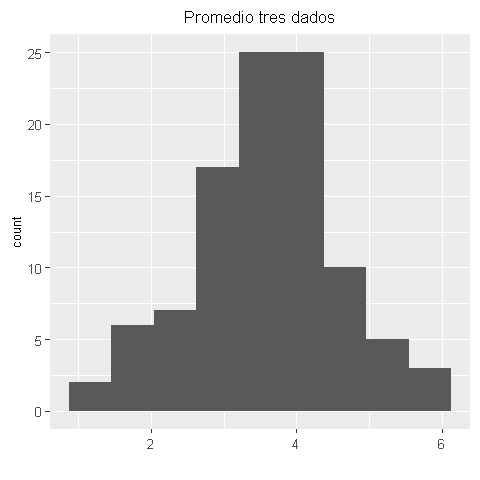

In [177]:
gf + geom_histogram(bins = 9)+
ggtitle('Promedio tres dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

La gráfica se ve así:

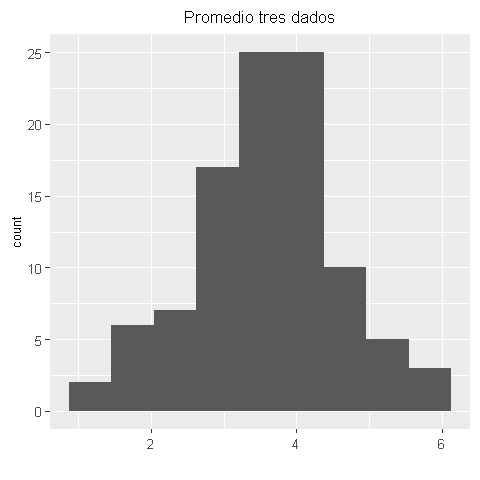

In [178]:
gf + geom_histogram(bins = 9)+
ggtitle('Promedio tres dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

Estos histogramas convergen a los de una distribución normal con media de $3.5$, igual a la de la distribución uniforme original.

# Ejercicios

1) Supóngase que el tiempo (en minutos) que una persona espera el Metrobús los días de semana sigue una distribución uniforme dada por, $$f(x) = \begin{cases}
\frac{1}{12} & \text{si } 0 \leq x \leq 12,\\
0 & \text{en otro caso}
\end{cases}$$

a) ¿Cuál es la probabilidad que una persona espere menos de $6$ minutos?.

In [179]:
#?dunif

In [180]:
#la distribución de probabilidad sale con punif, y queremos la probabilidad de que X=6
punif(6, min = 0, max = 12, lower.tail = TRUE, log.p = FALSE)

[1] 0.5

b) ¿Su tiempo medio de espera? ¿su desviación estándar?.

**Propiedades:**

* $\mu = \displaystyle \sum_{i=1}^ni\frac{1}{n} = \frac{n+1}{2}$.

* $\sigma = \sqrt{\displaystyle \sum_{i=1}^n(i-\mu)^2\frac{1}{n}} = \sqrt{\frac{n^2-1}{12}}$.

In [181]:
#n es = 12
media <- (12+1)/2
media

[1] 6.5

In [182]:
desvest_unif<-sqrt(((12^2)-1)/12)
desvest_unif

[1] 3.45

2) Considérese lanzamientos de una moneda no cargada. Sea $X$ la variable aleatoria que cuenta el número de águilas en $10$ lanzamientos. Calcular en *R* la probabilidad $P(X \geq 3)$ con la función `pbinom` y `dbinom`, el número medio de águilas y su desviación estándar.

In [183]:
#pbinom y dbinom
#?dbinom

con dbinom:

In [184]:
num_lanzamientos<-10
#vector_cuantiles va a ser el lanzamiento de una moneda (2 opciones)
#como es moneda justa, la prob de exito es 1/2
prob_exito<-1/2
#dbinom:
sum(dbinom(3:10, num_lanzamientos, prob_exito))
#dbinom(vector_cuantiles, num_lanzamientos, prob_exito, log = FALSE)
#x y q son vector de cuantiles, prob es la probabilidad de exito, lower tail debe ser false, size numéro de lanzamientos (en este caso, 10)


[1] 0.945

con pbinom:

In [185]:
pbinom(2, num_lanzamientos, prob_exito, lower.tail = FALSE, log.p = FALSE)

[1] 0.945

* La media y la desviación estándar de la distribición binomial con parámetros $n$ y $p$ están dadas por:

$$\mu = np.$$

$$\sigma = \sqrt{np(1-p)}.$$

Media:

In [186]:
media_binom_2<-num_lanzamientos*prob_exito
media_binom_2

[1] 5

Desviación Estándar:

In [187]:
desvest_binom_2<-sqrt((num_lanzamientos*prob_exito)*(1-prob_exito))
desvest_binom_2

[1] 1.58

3) Considérese una población de votantes en la ciudad de México. Se reporta que la proporción de votantes que favorecen al candidato del partido Naranja es igual a $0.40$. Dada una muestra aleatoria de $200$ votantes, ¿cuál es la probabilidad de que más de la mitad de ellos tengan intención de voto por el candidato naranja? Usar:

a)`pbinom`

In [188]:
pbinom(100, 200, .40, lower.tail = FALSE, log.p = FALSE)

[1] 0.00168

b) El teorema del límite central y `pnorm` considerando lo que se conoce como corrección por continuidad: si $B$ es variable aleatoria binomial con $\mu$ y $\sigma$ entonces $P(B=k) = P(k-0.5<X<k+0.5)$ con $X$ variable aleatoria normal $N(\mu,\sigma)$ y $k$ un número entero no negativo.

##### Teorema del Límite Central:

El hecho de que para un gran número de ensayos una distribución binomial se parezca, cada vez más a una normal, es un resultado parecido al Teorema de Bernoulli o Ley de los Grandes Números. Esencialmente es también una ley de los grandes números. La versión más general de este tipo de resultados es el llamado **Teorema del Límite Central** por el matemático ruso Aleksandr Lyapunov. En términos simples, el teorema nos dice que si tenemos **cierto número de variables aleatorias independientes con la misma distribución**, al aumentar su número, la **distribución de la suma** de sus resultados se **aproxima a una distribución normal**. Esto sucede **independientemente de cual sea la distribución original de las variables.**

El resultado del teorema aplica si cambiamos la palabra suma por **media**. Podemos, por ejemplo, iniciar con una distribución uniforme, tomar muestras aleatorias de tamaño dos y calcular sus medias. Después procedemos con muestras de tamaño tres, cuatro y así sucesivamente aumentamos el tamaño de la muestra. La **distribución de estas medias se aproxima a una normal con la misma media de la distribución original**. **La varianza de esta distribución normal disminuye conforme aumentamos el tamaño de la muestra**.

In [189]:
numero_ensayos_pnorm<-200
prob_exito_pnorm<-0.4

ext_der <- (numero_ensayos_pnorm/2)+.5


mu<-numero_ensayos_pnorm*.4 #media de B, por que es binomial

sigma<-sqrt((numero_ensayos_pnorm*prob_exito_pnorm)*(1-prob_exito_pnorm)) #desvest de B, por que es binomial

pnorm(ext_der,mu,sigma,lower.tail =F)

[1] 0.00154

4) Supongamos que el ingreso anual de un imigrante mexicano en los EUA se distribuye de forma normal con una media de $\$30,000$ y una desviación estándar de $\$10,000$ dólares. ¿Cuál es la probabilidad de que un inmigrante mexicano gane menos de $\$20,000$ dólares anuales?

In [190]:
media_ing_an<-30000
desvest_ing_an<-10000
objetivo<-20000
mayorque<-50000

#datos se distribujen normal:
pnorm(objetivo,media_ing_an,desvest_ing_an,lower.tail =T)

[1] 0.159

¿Cuál es la probabilidad de que su ingreso sea mayor a los $\$50,000$ dólares anuales? (usar *R*).

In [191]:
pnorm(mayorque,media_ing_an,desvest_ing_an,lower.tail =F)

[1] 0.0228